# **Тестовое задание для позиции "Психолингвист-исследователь"**

**Задача:** проанализировать два предоставленных текста (отрывки из интервью) с использованием комплексного лингвистического и психолингвистического подхода.


**Часть 1:** Расширенный лингвистический анализ

Установка и импорт необходимых библиотек

In [1]:
! pip install textstat

In [2]:
! pip uninstall pymorphy2
! pip install git+https://github.com/kmike/pymorphy2@master

Found existing installation: pymorphy2 0.9.1
Uninstalling pymorphy2-0.9.1:
  Would remove:
    /usr/local/bin/pymorphy
    /usr/local/lib/python3.11/dist-packages/pymorphy2-0.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pymorphy2/*
Proceed (Y/n)? Y
  Successfully uninstalled pymorphy2-0.9.1
  Cloning https://github.com/kmike/pymorphy2 (to revision master) to /tmp/pip-req-build-2m64p4j_
  Running command git clone --filter=blob:none --quiet https://github.com/kmike/pymorphy2 /tmp/pip-req-build-2m64p4j_
  Resolved https://github.com/kmike/pymorphy2 to commit 92d546f042ff14601376d3646242908d5ab786c1
  Preparing metadata (setup.py) ... done
  Created wheel for pymorphy2: filename=pymorphy2-0.9.1-py3-none-any.whl size=55237 sha256=906f91512949f562b6360ae6a7b1644fe63f6cb1abaddbe7ac66205c4eb192a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-4c26ggen/wheels/8f/f9/69/fe0b147c98d8181ff75e882b82f9ea68196acec68bbc01a9ec
Successfully built pymorphy2


In [3]:
! pip install natasha lexical-diversity

In [4]:
! pip install lexical_diversity

In [5]:
! pip install natasha -U

In [6]:
! pip install pymystem3

In [7]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 24.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import string
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
import pymorphy2
from lexical_diversity import lex_div as ld
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsMorphTagger,
    MorphVocab,
    Doc
)
from pymystem3 import Mystem
import spacy
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Загрузка текстов

In [9]:
text1 = """
Итак, если говорить о моём предыдущем месте работы, э как строился мой рабочий день, как вообще, в принципе, мой рабочий день проходил. Э мой рабочий день начинался, соответственно, в 8:00 утра. А в такое время он начинался, потому что мы работали не только с центральным регионом с Москвой, но мы работали, в принципе, со всей Россией, и в 8:00 утра это было то время, когда я ещё могла успеть дозвониться до тех клиентов, которые живут очень-очень далеко от нас, то есть э во Владивостоке, там в Иркутске и так далее. На Камчатке иногда тоже. А, вот, именно поэтому такой ранний э-э раннее начало рабочего дня было. (пауза) Э-э, первый час как раз-таки работы отводился на то, чтобы пообщаться с клиентами, которые находятся в дальних регионах. (пауза) Э, в дальнейшем э рабочий день строился так, то, что я занималась продажами и поиском новых клиентов. И первым делом нужно было в начале рабочего дня обзвонить э тех клиентов, которые горячие, и тех клиентов, с которыми на данный момент уже идут какие-то взаимодействия, то есть уже идёт какая-то продажа, уже идут какие-то договорённости, мы оформляем с ними какие-то договоры, либо э счета, то есть, э то, что вот у нас в приоритете, то, что вот сейчас у нас продастся или те проекты, которые у нас уже запущены, э ими занимаюсь в первую очередь. А далее уже, когда с важными делами покончено, занимаюсь э другими задачами, это в основном был поиск новых клиентов и обзвон тёплой базы, э и обработка, соответственно, входящих звонков и входящих обращений, но в основном это были исходящие звонки и, собственно, да, всё. (пауза) В течение рабочего дня, кроме выполнения основных э вот этих функций, предусмотрены были перерывы. В принципе, на них я могла отлучаться в любое время, когда было удобно. Вот. Ну, в основном я себе выбирала какой-то промежуток, с часу там до двух, например, обед. И в течение дня нас не ограничивали в том плане, э, чтобы мы, э-э, (пауза) как-то сидели вот от звонка до звонка. То есть, если мне нужно было отойти там на 5-10 минут, я спокойно отходила, ни у кого не отпрашивалась. (пауза) Вот. Э-э, в целом, наверное, всё по рабочему дню. (пауза) А, ещё была планёрка. Да, в 9:00 утра у нас была планёрка с руководителем отдела продаж, где мы обсуждали дальнейшие планы на день, какие-то текущие моменты, текущие задачи. В общем, в принципе, всё. (пауза) Вот.
"""

text2 = """
Э-э. (пауза) Мой рабочий день строится в воскресенье, потому что в воскресенье я строю план на неделю. Как правило, он состоит из встреч с клиентами. Э-э, собственно, я выполняю такую ещё задачу у нас, э-э, в спикерском бюро. М-м, то есть в воскресенье я с помощью amoCRM, э-э, выстраиваю свой график встреч. Параллельно ещё у меня есть там, э-э, календарь, э-э, в, э-э, ну, в телефоне непосредственно iOS версия, и ещё у меня есть, э-э, в почте Mail. Ещё есть ряд, э, ряд календарей со спикерами, с которыми мы работаем эксклюзивно. Э-э, вот. То есть у меня, в принципе, мой день забивается встречами. Поэтому удивительно, что я нашёл (пауза) для нас встречу. (смех) А-а, как правило, встречи состоят, делятся на две категории. Это встречи с клиентами, поддержание, э-э, в принципе, ситуации, э-э, работы, спрашиваю вообще, как происходят дела, вообще, какие есть результаты, э, какие есть планы и так далее. А-а, поиск новых клиентов. Нам приходят заявки, как правило, мы стараемся с новыми клиентами встретиться. Ну и также встречаемся со спикерами, э-э, разного рода формата. Тоже это могут быть и онлайн-встречи, и офлайн. То есть по-разному. Э-э, вот. Задачи выполняю какие: стратегические. Изначально я выполнял все задачи, начиная от ведения бизнеса, то есть это просто ведение документооборота, оформление документов, э-э, бухгалтерия, ЭДО в том числе. Ну сейчас оно немножко (пауза) повысилось. Занимаюсь развитием (пауза) компании в целом, представительств у нас в регионах, общаюсь активно, стратегическое общение со спикерами с интересными. А-а, в целом это управленческие задачи, связанные с контролем КАМов, э-э, нахождением тоже, э-э, новых сотрудников, HR какие-то функции выполняю. А-а, общение у нас с коммерческим директором, общение с бухгалтерией. М-м, в принципе, на мне висит последнее всё равно слово, э-э, в бухгалтерии, то есть это подписание налоговой декларации, мы её так давно сдали. М-м, э-э, вот. И в целом, да, это финансовые потоки, построение задач также для сотрудников, анализ в amoCRM. А-а, хм, какие-то у нас есть встречи, э-э, внутренние. Как правило, это один брейншторм, э-э, в, в неделю происходит. Скорее всего, это, ну, как обычно, это в конце, но иногда в понедельник. А-а, то есть некая такая адженда, да? Что сделал, какие результаты, SMART вот это вот делаем. А-а, вот. Ну, в целом, да, достаточно большой пласт работы выполняю. У меня нет какого-то регламента, нет, э-э, каких-то там процедур. То есть делаю, делаю, как чувствую.
Вот. Э-э, наверное, так. Ненормиро- ненормированный рабочий график, э-э, 24х7, грубо говоря, да. То есть со спикерами иногда в Беларуси, допустим, там выходные, где-то выходных нет, в Америке там вообще выходных нет. Иногда переписываемся там с некоторыми спикерами. То есть, м-м, иногда и ночью работаем, особенно когда какие-то иностранные международные проекты, там приходится ночью работать. Э-э, вот. Наверное, в целом вот так. То есть являюсь тоже, по сути дела, своего рода HR-ом.
У меня жена заканчивала HR направление, понимаю структуру, вот эти фокус-группы, всякие такие направления крутые штуки делаем. Ещё организовываю мероприятия для вну- внутри компании. М-м, это для прокачки софт-скиллов. Э-э, потому что у нас некоторые люди есть на аутсорсе, но мы за то, чтобы всё равно какой-то add value для них дополнительный иметь. Э-э, предоставлять. Э-э, и вот делаем, э-э, разного рода встречи с интересными людьми, со спикерами, с космонавтами иногда. Вот. Бывает и такое. Наверное, вот в целом вот так.
"""

Поместим тексты в датафрейм для удобства

In [10]:
df = pd.DataFrame({
    'text_id': ['text1', 'text2'],
    'text': [text1, text2]
})

df.head()

,text_id,text
0,text1,"\nИтак, если говорить о моём предыдущем месте ..."
1,text2,\nЭ-э. (пауза) Мой рабочий день строится в вос...


Функция для предобработки текста

In [11]:
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Убираем скобки с пояснениями (пауза, смех)
    text = re.sub(r'\(.*?\)', '', text)
    # Убираем хезитации
    fillers = ['э-э', 'э', 'м-м', 'вот', 'аа', 'аа-', 'а-а', 'мм', 'ээ', 'ээ-']
    for f in fillers:
        text = text.replace(f, '')
    # Убираем знаки препинания, кроме дефиса и двоеточия
    punct_to_remove = string.punctuation.replace(':', '').replace('-', '')
    text = text.translate(str.maketrans('', '', punct_to_remove + '«»—…“”'))
    # Убираем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Применим к датафрейму
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,text_id,text,clean_text
0,text1,"\nИтак, если говорить о моём предыдущем месте ...",итак если говорить о моём предыдущем месте раб...
1,text2,\nЭ-э. (пауза) Мой рабочий день строится в вос...,мой рабочий день строится в воскресенье потому...


Добавим колонку с лемматизированным текстом для удобства дальнейших подсчетов метрик

In [12]:
# Инициализируем морфологический анализатор
morph = pymorphy2.MorphAnalyzer()

# Функция лемматизации текста
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmas = [morph.parse(token)[0].normal_form for token in tokens if token.isalpha()]
    return ' '.join(lemmas)

# Функция лемматизации, возвращающая список лемм
def lemmatize_text_list(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmas = [morph.parse(token)[0].normal_form for token in tokens if token.isalpha()]
    return lemmas

# Применяем к колонке clean_text и создаём новую колонку
df['lemmatized_text'] = df['clean_text'].apply(lemmatize_text)

# Создаём столбец со списками лемм
#df['lemmas'] = df['clean_text'].apply(lemmatize_text_list)

In [13]:
df

,text_id,text,clean_text,lemmatized_text
0,text1,"\nИтак, если говорить о моём предыдущем месте ...",итак если говорить о моём предыдущем месте раб...,итак если говорить о мой предыдущий место рабо...
1,text2,\nЭ-э. (пауза) Мой рабочий день строится в вос...,мой рабочий день строится в воскресенье потому...,мой рабочий день строиться в воскресение потом...


Рассчитаем базовые метрики и количественные показатели по текстам: общее количество слов, предложений, среднюю длину предложений

In [14]:
def basic_metrics(text):
    # Токенизация
    sentences = sent_tokenize(text, language='russian')
    words = word_tokenize(text, language='russian')
    total_words = len(words)
    total_sentences = len(sentences)

    # Средняя длина предложения (в словах)
    avg_sent_len = total_words / total_sentences if total_sentences > 0 else 0

    return {
        'total_words': total_words,
        'total_sentences': total_sentences,
        'avg_sent_len': avg_sent_len,
    }

Собираем в датафрейм

In [15]:
metrics_list = []
for idx, row in df.iterrows():
    m = basic_metrics(row['clean_text'])
    m['text_id'] = row['text_id']
    metrics_list.append(m)

metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

   total_words  total_sentences  avg_sent_len text_id
0          362                1         362.0   text1
1          479                1         479.0   text2


  1.1   Базовые метрики



---



*   Сложность текста (индекс читабельности, один или несколько)

В этом блоке мы рассчитываем три популярных показателя читаемости текста:

*   Flesch Reading Ease: чем выше значение, тем легче читается текст. Приобретает значения от 0 до 100. Текст, приобретающий значение больше 60 считается легким для чтения.

*   Gunning Fog Index: оценивает количество лет образования, необходимого для понимания текста. Приобретает значения от 0 до 20. Чем ниже значение - тем текст проще для понимания.

*   Coleman–Liau Index: оценивает читаемость текста на основе средней длины слова (в буквах) и длины предложения (в словах). Подходит для коротких текстов и отражает, на каком образовательном уровне читатель сможет понять текст. Чем ниже значение - тем текст проще для понимания.


In [16]:
def calculate_readability_metrics(text):
    return pd.Series({
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'gunning_fog_index': textstat.gunning_fog(text),
        'coleman_liau_index': textstat.coleman_liau_index(text)
    })

# Применяем к колонке с текстами
df_readability = df['text'].apply(calculate_readability_metrics)
df = pd.concat([df, df_readability], axis=1)

Смотрим значения по индексам

In [17]:
df

,text_id,text,clean_text,lemmatized_text,flesch_reading_ease,gunning_fog_index,coleman_liau_index
0,text1,"\nИтак, если говорить о моём предыдущем месте ...",итак если говорить о моём предыдущем месте раб...,итак если говорить о мой предыдущий место рабо...,100.017778,8.755556,9.742640
1,text2,\nЭ-э. (пауза) Мой рабочий день строится в вос...,мой рабочий день строится в воскресенье потому...,мой рабочий день строиться в воскресение потом...,109.714019,4.686957,10.759926


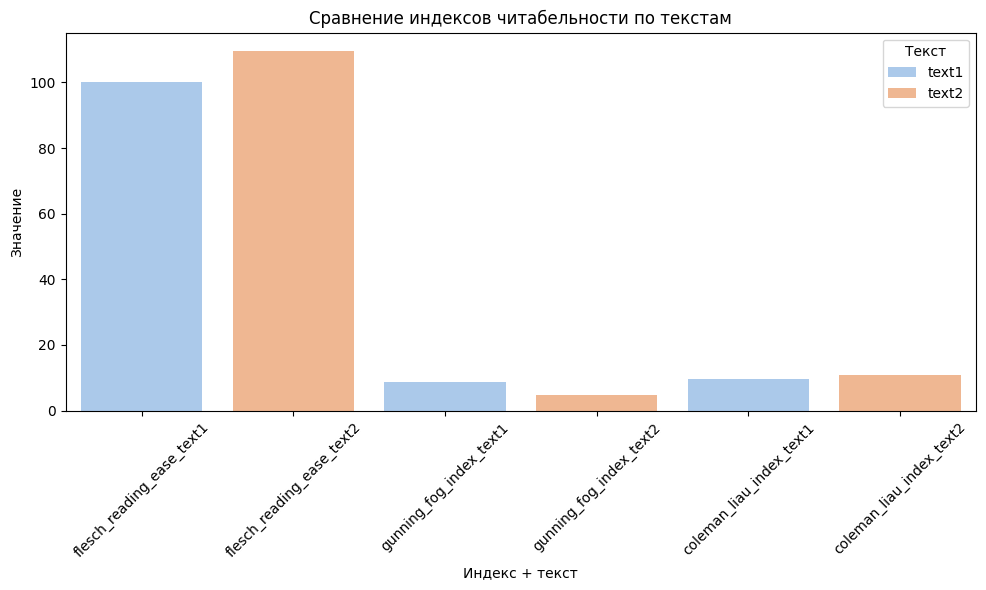

In [18]:
# melt: делаем "длинную" таблицу
df_long = df.melt(
    id_vars='text_id',
    value_vars=['flesch_reading_ease', 'gunning_fog_index', 'coleman_liau_index'],
    var_name='Index',
    value_name='Value'
)

# задаем порядок для оси X: по 2 колонки рядом на каждый индекс
index_order = ['flesch_reading_ease', 'gunning_fog_index', 'coleman_liau_index']
text_order = df['text_id'].tolist()

# создаем новый столбец для группировки по парам (текст + индекс)
df_long['pair'] = df_long['Index'] + '_' + df_long['text_id']

# строим график
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_long,
    x='pair',
    y='Value',
    hue='text_id',
    palette='pastel'
)

# форматируем подписи
plt.title('Сравнение индексов читабельности по текстам')
plt.xlabel('Индекс + текст')
plt.ylabel('Значение')
plt.xticks(rotation=45)
plt.legend(title='Текст')
plt.tight_layout()
plt.show()

Выводы о сложности текстов на основе показателей индексов читабельности:

- **Flesch Reading Ease:** Text2 имеет более высокий показатель (109.7 vs 100.0), что свидетельствует о большей лёгкости восприятия по сравнению с Text1.

- **Gunning Fog Index:** Text1 имеет более высокий индекс (8.76 vs 4.69), указывая на более высокую сложность и требуемый уровень образования для понимания.

- **Coleman–Liau Index:** Text2 немного превосходит Text1 по значению (10.76 vs 9.74), что может отражать более формальный или технический стиль текста.



---


*   Метрики частотности слов

Были использованы следующие метрики для оценки частотных характеристик текста:

- **TTR (Type-Token Ratio)** — коэффициент лексического разнообразия, рассчитывается как отношение количества уникальных слов (лемм) к общему количеству слов в тексте. Более высокое значение TTR указывает на более разнообразную лексику.  
  **Формула:** `TTR = количество уникальных лемм / общее количество лемм`

- **Средняя частота слов (avg_freq)** — средняя частота употребления всех лемм текста на основе частотного словаря (в нашем случае — частотный список 500 лемм из НКРЯ). Чем выше значение, тем более общеупотребимыми являются слова текста.  
  **Формула:** `avg_freq = среднее значение частот всех лемм, найденных в списке`

- **MTLD (Measure of Textual Lexical Diversity)** — это способ измерить, насколько разнообразны слова в тексте.  
  Он показывает, как долго можно читать текст, прежде чем словарное разнообразие начнёт заметно падать.  

  Проще говоря: если в тексте часто повторяются одни и те же слова, MTLD будет низким. Если автор использует много разных слов — MTLD будет высоким.  

  **Преимущество:** MTLD менее чувствительна к длине текста, чем TTR, и даёт более надёжные результаты при сравнении текстов разного объема.

In [19]:
# Загрузка частотного словаря
freq_df = pd.read_csv('ruscorpora_content.csv', sep=';', quotechar='"')
freq_dict = dict(zip(freq_df['lex'], freq_df['ipm']))

# Вспомогательные функции
def compute_ttr(lemmas):
    return len(set(lemmas)) / len(lemmas) if lemmas else 0

def compute_avg_freq(lemmas, freq_dict):
    freqs = [freq_dict.get(lemma, 0) for lemma in lemmas]
    return sum(freqs) / len(freqs) if freqs else 0

def compute_mtld(lemmas):
    return ld.mtld(lemmas)

# Применяем метрики к уже лемматизированному тексту
df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())

df['TTR'] = df['lemmatized_tokens'].apply(compute_ttr)
df['avg_freq'] = df['lemmatized_tokens'].apply(lambda lemmas: compute_avg_freq(lemmas, freq_dict))
df['MTLD'] = df['lemmatized_tokens'].apply(compute_mtld)

# Вывод результата
print(df[['text_id', 'TTR', 'avg_freq', 'MTLD']])

  text_id       TTR     avg_freq       MTLD
0   text1  0.441261  5879.765973  45.786035
1   text2  0.451404  4501.492484  64.537448


Визуализируем метрики частотности

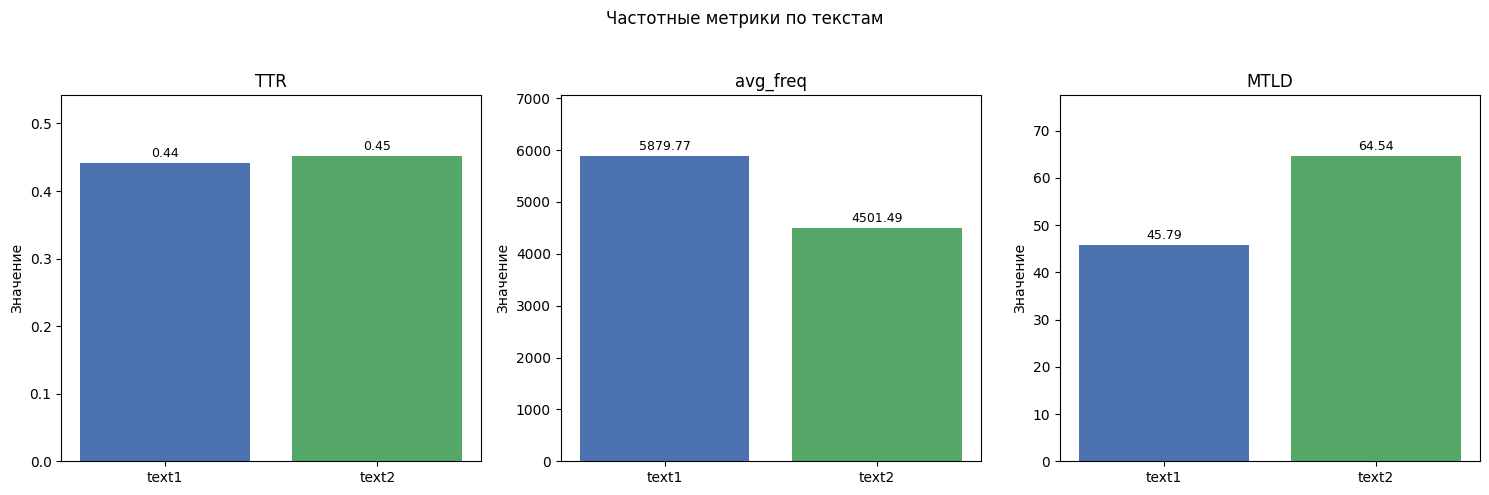

In [20]:
metrics = ['TTR', 'avg_freq', 'MTLD']
texts = df['text_id'].tolist()

# Значения метрик
values = [df[metric].tolist() for metric in metrics]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.bar(texts, values[i], color=['#4c72b0', '#55a868'])
    ax.set_title(metrics[i])
    ax.set_ylim(0, max(values[i]) * 1.2)
    ax.set_ylabel('Значение')
    for j, val in enumerate(values[i]):
        ax.text(j, val + 0.02 * max(values[i]), f'{val:.2f}', ha='center', fontsize=9)

plt.suptitle('Частотные метрики по текстам')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Выводы о частотных характеристиках слов текстов:

- **TTR (Type-Token Ratio)** — отношение количества уникальных слов к общему количеству слов в тексте.  
  - *Text1*: 0.44 → около 44% слов в тексте уникальны.  
  - *Text2*: 0.45 → немного выше, что говорит о большей лексической вариативности.

- **Средняя частотность (avg_freq)** — среднее значение частот слов по данным частотного словаря НКРЯ.  
  - *Text1*: 5879.8 → в тексте в среднем используются более общеупотребимые слова.  
  - *Text2*: 4501.5 → используются менее частотные слова, что может свидетельствовать о более разнообразной или специализированной лексике.

- **MTLD (Measure of Textual Lexical Diversity)** — показатель лексического разнообразия, устойчивый к размеру текста.  
  - *Text1*: 45.79  
  - *Text2*: 64.54 → значительно выше, что указывает на более разнообразную лексику.

**Вывод:**  
Text2 отличается большей лексической вариативностью и менее частотной лексикой по сравнению с Text1.




---



*   Self-focus индекс

Self-focus индекс — показатель, отражающий степень сосредоточенности говорящего на себе. Рассчитывается как доля местоимений первого лица (например, я, мне, мой, мы) по отношению к общему числу местоимений или всех слов в тексте. Более высокий индекс указывает на выраженный личностный фокус в высказывании.

In [21]:
# Список личных местоимений первого лица (леммы)
FIRST_PERSON_PRONOUNS = {
    # Личные местоимения
    "я",
    "мы",

    # Притяжательные местоимения
    "мой",
    "наш",

    # Возвратные местоимения
    "себя",
    "себе",
    "собой"
}

# Функция вычисления self-focus по леммам
def compute_self_focus_from_lemmas(lemmatized_text):
    lemmas = lemmatized_text.split()
    if not lemmas:
        return 0
    self_count = sum(1 for lemma in lemmas if lemma in FIRST_PERSON_PRONOUNS)
    return self_count / len(lemmas)

# Применяем к колонке 'lemmatized_text'
df['self_focus'] = df['lemmatized_text'].apply(compute_self_focus_from_lemmas)

# Смотрим результат
df[['text_id', 'self_focus']].head()

,text_id,self_focus
0,text1,0.063037
1,text2,0.051836


Визуализация результатов self-focus index

/tmp/ipython-input-22-823531931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='text_id', y='self_focus', data=df, palette='pastel')


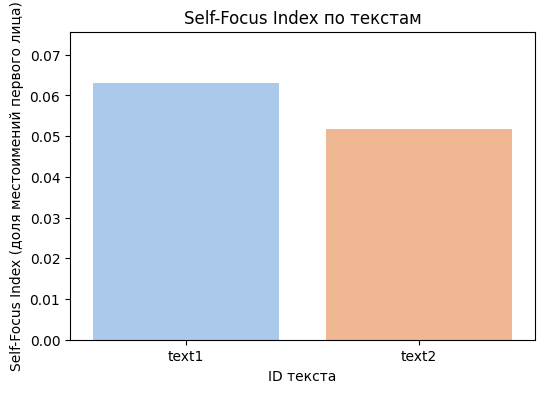

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x='text_id', y='self_focus', data=df, palette='pastel')
plt.title('Self-Focus Index по текстам')
plt.xlabel('ID текста')
plt.ylabel('Self-Focus Index (доля местоимений первого лица)')
plt.ylim(0, max(df['self_focus']) * 1.2)
plt.show()

Self-focus индекс в тексте 1 (6.3%) выше, чем в тексте 2 (5.1%), что указывает на большую степень личной вовлечённости и акцент на собственных действиях и переживаниях в первом тексте. Текст 2, с более низким значением, содержит меньше прямых упоминаний о себе и больше нейтральных элементов. Это может свидетельствовать о разной манере изложения: первый текст более субъективен и ориентирован на личный опыт.



---



*   Соотношение абстрактных/конкретных понятий

Сначала используем подход, представленный в статье Brysbaert et al. (2014) и основанный на словаре. Представлен большой словарь конкретности (concreteness ratings) для английских слов — это эмпирические оценки того, насколько слово воспринимается как конкретное или абстрактное, на шкале примерно от 1 (очень абстрактное) до 5 (очень конкретное). Далее для каждого слова из текста находится в словаре его конкретность и рассчитывается средний балл конкретности для текста. Для русского языка был найден такой словарь, описанный в работе Соловьев В.Д., Вольская Ю.А., Андреева М.И., Заикин А.А. Словарь русского языка
с индексами конкретности/абстрактности. Russian Journal of Linguistics. 2022. Т. 26.
№ 2. С. 515–549. https://doi.org/10.22363/2687-0088-29475 , там представлены списки для прилагательных и существительных

Сначала прочитаем xlsx файл и приведем его в вид словаря для машинной обработки

In [23]:
filename = "Slovar.r.ya..s.indeksom.konkretnosti.slov.xlsx"

# Читаем обе вкладки
df_adj = pd.read_excel(filename, sheet_name='adj')
df_nouns = pd.read_excel(filename, sheet_name='nouns')

# Объединяем оба DataFrame по строкам
df_concreteness = pd.concat([df_adj, df_nouns], ignore_index=True)

# Для удобства можно привести колонку с индексом к float, если там запятая:
df_concreteness['Индекс С/A'] = df_concreteness['Индекс С/A'].astype(str).str.replace(',', '.').astype(float)

# Создаем словарь для быстрого поиска конкретности по слову
concreteness_dict = dict(zip(df_concreteness['word'], df_concreteness['Индекс С/A']))

Посмотрим диапазон значений в словаре, визуализируем

Минимум: -4.914503505971854
Максимум: 4.555348061489413
Среднее: 0.43821477672079556
Медиана: 0.4891743762340093


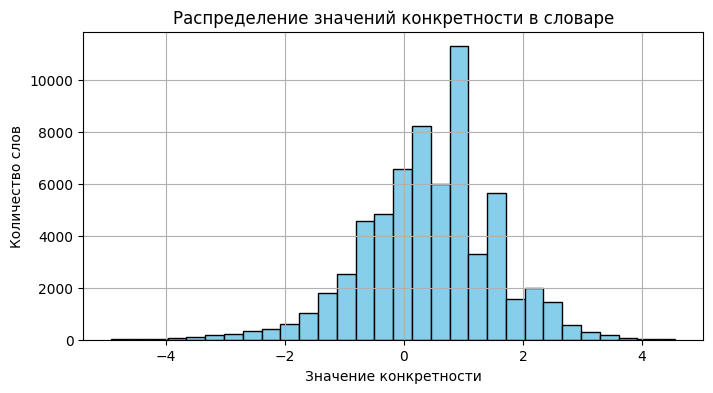

In [24]:
concreteness_values = list(concreteness_dict.values())

# Базовая статистика
print("Минимум:", min(concreteness_values))
print("Максимум:", max(concreteness_values))
print("Среднее:", sum(concreteness_values) / len(concreteness_values))
print("Медиана:", sorted(concreteness_values)[len(concreteness_values)//2])

# Гистограмма
plt.figure(figsize=(8,4))
plt.hist(concreteness_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение значений конкретности в словаре')
plt.xlabel('Значение конкретности')
plt.ylabel('Количество слов')
plt.grid(True)
plt.show()

In [25]:
# Функция для расчёта средней конкретности по списку лемм
def average_concreteness_lemmas(lemmas, concreteness_dict):
    scores = [concreteness_dict[lemma] for lemma in lemmas if lemma in concreteness_dict]
    return sum(scores) / len(scores) if scores else None

# Применяем функцию к колонке с леммами
df['concreteness_index'] = df['lemmatized_tokens'].apply(lambda lemmas: average_concreteness_lemmas(lemmas, concreteness_dict))

# Выводим результат
print(df[['text_id', 'concreteness_index']])

  text_id  concreteness_index
0   text1           -0.863864
1   text2           -1.080629


/tmp/ipython-input-26-4033664977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['text_id'], y=df['concreteness_index'], palette=palette)


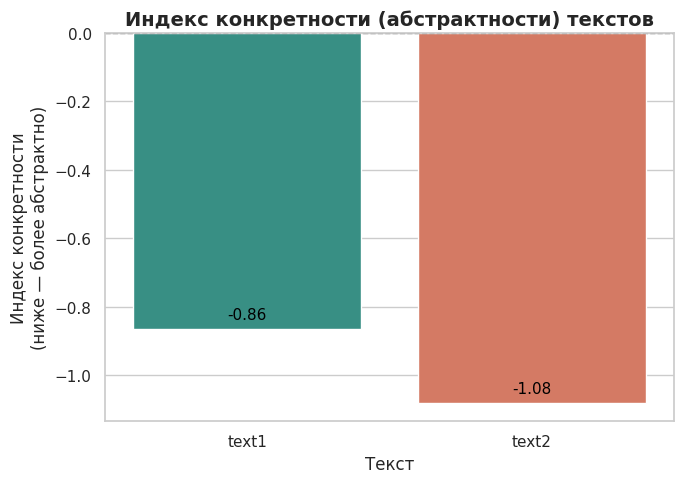

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

# Цвета для столбцов
palette = sns.color_palette(["#2a9d8f", "#e76f51"])

# Построение столбчатой диаграммы
ax = sns.barplot(x=df['text_id'], y=df['concreteness_index'], palette=palette)

# Добавляем подписи над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11,
                color='black',
                xytext=(0, 5),
                textcoords='offset points')

ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Подписи осей и заголовок
ax.set_title('Индекс конкретности (абстрактности) текстов', fontsize=14, weight='bold')
ax.set_xlabel('Текст', fontsize=12)
ax.set_ylabel('Индекс конкретности\n(ниже — более абстрактно)', fontsize=12)

plt.tight_layout()
plt.show()

Сравнение индексов конкретности текстов: более низкое значение индекса соответствует более абстрактной лексике.

- Text1 имеет индекс конкретности примерно **-0.81** и содержит относительно более конкретные понятия и слова.

- Text2 — более низкий индекс, около **-1.07**, использует более абстрактные слова по сравнению с Text1.

1.2 Дополнительные метрики для анализа



---





*  Сложность синтаксических конструкций (средняя длина предложений, глубина вложенности)



Для оценки сложности синтаксических конструкций мы используем две основные метрики:

1. **Средняя длина предложений**  
   Показывает среднее количество слов в одном предложении. Более длинные предложения обычно свидетельствуют о более сложной синтаксической структуре.

2. **Глубина вложенности синтаксиса**  
   Отражает, насколько глубоко вложены синтаксические конструкции (например, наличие придаточных предложений и других вложенных элементов). Для её оценки используется парсинг синтаксического дерева и вычисление максимальной глубины вложенности по предложениям.

В дальнейшем эти метрики помогут количественно сравнить синтаксическую сложность разных текстов.

Загружаем модель для русского языка

In [28]:
nlp = spacy.load('ru_core_news_sm')

In [29]:
def average_sentence_length(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    if not sentences:
        return 0
    lengths = [len([token for token in sent if token.is_alpha]) for sent in sentences]
    return np.mean(lengths)

def max_syntax_depth(doc):
    def node_depth(token):
        if not list(token.children):
            return 1
        else:
            return 1 + max(node_depth(child) for child in token.children)
    return max(node_depth(sent.root) for sent in doc.sents)

# Применяем к DataFrame
df['avg_sentence_length'] = df['lemmatized_text'].apply(average_sentence_length)

# Для глубины синтаксиса применяем к объекту spacy Doc
df['syntax_depth'] = df['lemmatized_text'].apply(lambda text: max_syntax_depth(nlp(text)))

print(df[['text_id', 'avg_sentence_length', 'syntax_depth']])

  text_id  avg_sentence_length  syntax_depth
0   text1           349.000000            17
1   text2           154.333333            12


Визуализируем результаты

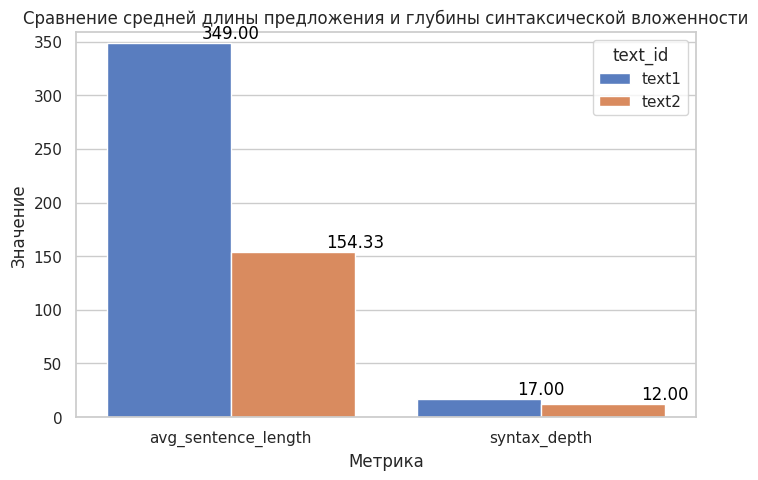

In [30]:
sns.set(style="whitegrid")

# Данные для визуализации
plot_df = df[['text_id', 'avg_sentence_length', 'syntax_depth']].melt(id_vars='text_id',
                                                                     value_vars=['avg_sentence_length', 'syntax_depth'],
                                                                     var_name='Measure', value_name='Value')

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Measure', y='Value', hue='text_id', palette='muted')

plt.title('Сравнение средней длины предложения и глубины синтаксической вложенности')
plt.ylabel('Значение')
plt.xlabel('Метрика')

for i, row in plot_df.iterrows():
    plt.text(x=['avg_sentence_length', 'syntax_depth'].index(row['Measure']) + (0 if row['text_id']=='text1' else 0.4),
             y=row['Value'] + 0.5,
             s=f"{row['Value']:.2f}",
             color='black',
             ha='center',
             va='bottom')

plt.ylim(0, max(plot_df['Value']) + 10)
plt.show()

Выводы о синтаксической структуре текстов:

- **Текст1** содержит более длинные предложения и более сложные синтаксические структуры, что может указывать на формальный стиль изложения.

- **Текст2** имеет более короткие предложения и меньшую глубину вложенности, что говорит о более разговорном и неформальном стиле речи.

Таким образом, синтаксический анализ подтверждает различия в стиле и сложности текстов.



---



*   Temporal focus (прошлое, настоящее, будущее)

Для анализа временной направленности высказываний (temporal focus) мы использовали комбинированный подход:

1. **Морфологический анализ глаголов**  
   Мы использовали `pymorphy2` для определения временной формы глаголов.  
   - Если глагол имеет граммему `past`, индикатор прошлого времени.
   - Если глагол содержит `pres`, индикатор настоящего.
   - Если глагол содержит `futr`, индикатор будущего.

2. **Поиск временных наречий**  
   Мы собрали списки наречий, типично указывающих на определённое время:
   - Прошлое: _вчера, прежде, тогда, недавно_ и др.
   - Настоящее: _сейчас, ныне, теперь_ и др.
   - Будущее: _завтра, вскоре, скоро, послезавтра, впоследствии_ и др.

   Все слова в тексте получают морфологический разбор, затем ищутся нужные признаки.

3. **Агрегация признаков**  
   Для каждого текста мы считаем количество временных индикаторов по глаголам и наречиям.  

Такой подход позволяет извлекать временной фокус высказывания.


In [31]:
# Расширенные словари временных наречий
temporal_adverbs_by_time = {
    'past': {
        'вчера', 'позавчера', 'давно', 'недавно', 'раньше', 'прежде',
        'в прошлом', 'на днях', 'ранее', 'некоторое время назад',
        'год назад', 'месяц назад', 'неделю назад', 'тогда'
    },
    'present': {
        'сейчас', 'в данный момент', 'в настоящее время', 'на данный момент',
        'теперь', 'прямо сейчас', 'настоящий', 'тут же', 'немедленно'
    },
    'future': {
        'завтра', 'послезавтра', 'скоро', 'в будущем', 'позже',
        'в следующем году', 'на следующей неделе', 'в следующий раз',
        'через год', 'через неделю', 'в ближайшее время'
    }
}

# Собираем всё в один плоский набор для быстрого поиска
temporal_adverbs_flat = set()
for adverbs in temporal_adverbs_by_time.values():
    temporal_adverbs_flat.update(adverbs)

# Инициализация морфологического анализатора
morph = pymorphy2.MorphAnalyzer()

# Функция для анализа временного фокуса
def temporal_focus_analysis(text, temporal_adverbs_by_time, temporal_adverbs_flat):
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Подсчет времен глаголов
    verb_tenses = {'past': 0, 'present': 0, 'future': 0}
    total_verbs = 0

    for token in tokens:
        parses = morph.parse(token)
        if not parses:
            continue
        parse = parses[0]
        if 'VERB' in parse.tag or 'INFN' in parse.tag:
            total_verbs += 1
            if 'past' in parse.tag:
                verb_tenses['past'] += 1
            elif 'pres' in parse.tag:
                verb_tenses['present'] += 1
            elif 'futr' in parse.tag:
                verb_tenses['future'] += 1

    # Нормализация по общему количеству глаголов
    if total_verbs > 0:
        for k in verb_tenses:
            verb_tenses[k] /= total_verbs
    else:
        verb_tenses = {'past': 0, 'present': 0, 'future': 0}

    # Подсчет временных наречий
    adverb_counts = {'past': 0, 'present': 0, 'future': 0}
    for token in tokens:
        for label, adverbs in temporal_adverbs_by_time.items():
            if token in adverbs:
                adverb_counts[label] += 1

    total_adverbs = sum(adverb_counts.values())

    return {
        'verb_tenses': verb_tenses,
        'temporal_adverb_counts': adverb_counts,
        'total_adverbs': total_adverbs
    }

# Применяем к колонке text
df['temporal_focus'] = df['text'].apply(
    lambda x: temporal_focus_analysis(x, temporal_adverbs_by_time, temporal_adverbs_flat)
)

# Раскладываем результаты в отдельные колонки
df['past_verb_ratio'] = df['temporal_focus'].apply(lambda x: x['verb_tenses']['past'])
df['present_verb_ratio'] = df['temporal_focus'].apply(lambda x: x['verb_tenses']['present'])
df['future_verb_ratio'] = df['temporal_focus'].apply(lambda x: x['verb_tenses']['future'])

df['past_adverb_count'] = df['temporal_focus'].apply(lambda x: x['temporal_adverb_counts']['past'])
df['present_adverb_count'] = df['temporal_focus'].apply(lambda x: x['temporal_adverb_counts']['present'])
df['future_adverb_count'] = df['temporal_focus'].apply(lambda x: x['temporal_adverb_counts']['future'])
df['total_temporal_adverbs'] = df['temporal_focus'].apply(lambda x: x['total_adverbs'])

# Просмотр результата
print(df[['text_id', 'past_verb_ratio', 'present_verb_ratio', 'future_verb_ratio',
          'past_adverb_count', 'present_adverb_count', 'future_adverb_count', 'total_temporal_adverbs']])

  text_id  past_verb_ratio  present_verb_ratio  future_verb_ratio  \
0   text1         0.574468            0.170213           0.021277   
1   text2         0.095238            0.539683           0.015873   

   past_adverb_count  present_adverb_count  future_adverb_count  \
0                  0                     1                    0   
1                  1                     1                    0   

   total_temporal_adverbs  
0                       1  
1                       2  


Визуализируем результаты для глаголов

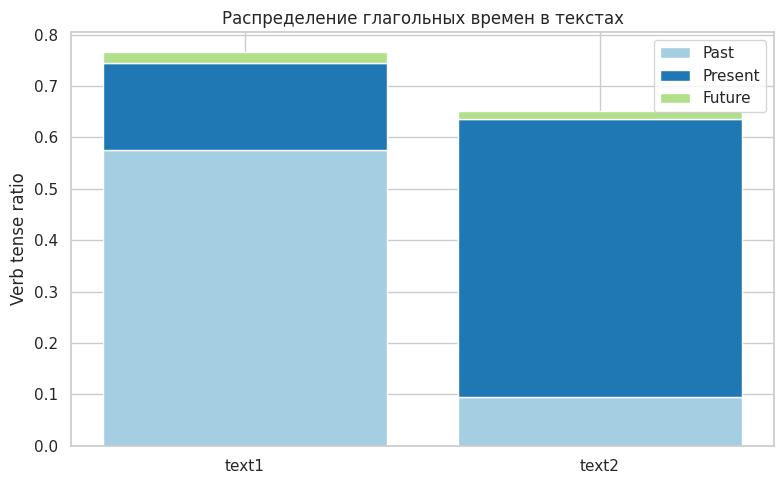

In [32]:
# Данные
verb_ratios = df[['past_verb_ratio', 'present_verb_ratio', 'future_verb_ratio']]
labels = df['text_id']

# Визуализация
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(labels, verb_ratios['past_verb_ratio'], label='Past', color='#a6cee3')
ax.bar(labels, verb_ratios['present_verb_ratio'], bottom=verb_ratios['past_verb_ratio'], label='Present', color='#1f78b4')
ax.bar(labels, verb_ratios['future_verb_ratio'],
       bottom=verb_ratios['past_verb_ratio'] + verb_ratios['present_verb_ratio'], label='Future', color='#b2df8a')

ax.set_ylabel('Verb tense ratio')
ax.set_title('Распределение глагольных времен в текстах')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Выводы о временном фокусе текстов:

- **Текст 1** демонстрирует выраженную ориентацию на **прошедшее** время: более 57% глаголов находятся в прошедшем времени. Присутствует одно наречие, связанное с настоящим временем.  
- **Текст 2** имеет доминирование **настоящего времени** в глаголах (около 54%), с меньшей долей прошедших форм. В тексте встречаются наречия как настоящего, так и прошедшего времени.

Таким образом, **текст 1 можно охарактеризовать как ретроспективный**, тогда как **текст 2 ближе к актуальному описанию происходящего**



---



*   Certainty vs uncertainty markers

Для оценки степени выраженности уверенности и сомнений в тексте реализован подход на основе лексического анализа, описанный в статье Rubin & Liddy (2006).  
Используются специализированные словари маркеров уверенности, неуверенности и хезитации, составленные с учётом особенностей русского языка и наших текстов.  
Подсчитывается частота встречаемости этих маркеров в тексте с нормализацией на общее количество слов, что даёт количественную меру выраженности данных характеристик.

In [33]:
# Уверенность (certainty) — маркеры уверенности, утверждения
certainty_markers = {
    "конечно", "безусловно", "явно", "точно", "без сомнения", "определённо",
    "ясно", "конечно", "действительно", "очевидно", "несомненно",
    "знаю", "знаешь", "уверен", "уверена", "всегда", "именно", "вот"
}

# Неуверенность (uncertainty) — выражения сомнения, предположения
uncertainty_markers = {
    "возможно", "кажется", "наверное", "пожалуй", "мог бы", "может быть",
    "вроде", "как будто", "по-моему", "похоже", "примерно", "почти", "почти что",
    "скорее всего", "вероятно", "сомневаюсь", "как бы", "будто", "как будто"
}

# Хезитация (hesitation) — междометия и слова-заполнители речи
hesitation_markers = {
    "ээ", "эм", "ну", "вот", "типа", "как бы", "короче", "значит", "в общем", "это", "эээ"
}

In [34]:
def count_certainty_uncertainty_hesitation(text):
    # Приводим к нижнему регистру
    text_lower = text.lower()

    # Разбиваем на слова (простая токенизация)
    words = re.findall(r'\b\w+\b', text_lower)
    total_words = len(words)
    if total_words == 0:
        return {
            'certainty_count': 0,
            'uncertainty_count': 0,
            'hesitation_count': 0,
            'certainty_ratio': 0,
            'uncertainty_ratio': 0,
            'hesitation_ratio': 0
        }

    # Считаем маркеры
    certainty_count = sum(word in certainty_markers for word in words)
    uncertainty_count = sum(word in uncertainty_markers for word in words)
    hesitation_count = sum(word in hesitation_markers for word in words)

    # Вычисляем отношение к общему количеству слов
    certainty_ratio = certainty_count / total_words
    uncertainty_ratio = uncertainty_count / total_words
    hesitation_ratio = hesitation_count / total_words

    return {
        'certainty_count': certainty_count,
        'uncertainty_count': uncertainty_count,
        'hesitation_count': hesitation_count,
        'certainty_ratio': certainty_ratio,
        'uncertainty_ratio': uncertainty_ratio,
        'hesitation_ratio': hesitation_ratio
    }

df['certainty_metrics'] = df['text'].apply(count_certainty_uncertainty_hesitation)

df['certainty_count'] = df['certainty_metrics'].apply(lambda x: x['certainty_count'])
df['uncertainty_count'] = df['certainty_metrics'].apply(lambda x: x['uncertainty_count'])
df['hesitation_count'] = df['certainty_metrics'].apply(lambda x: x['hesitation_count'])

df['certainty_ratio'] = df['certainty_metrics'].apply(lambda x: x['certainty_ratio'])
df['uncertainty_ratio'] = df['certainty_metrics'].apply(lambda x: x['uncertainty_ratio'])
df['hesitation_ratio'] = df['certainty_metrics'].apply(lambda x: x['hesitation_ratio'])

print(df[['text_id', 'certainty_count', 'uncertainty_count', 'hesitation_count',
          'certainty_ratio', 'uncertainty_ratio', 'hesitation_ratio']])

  text_id  certainty_count  uncertainty_count  hesitation_count  \
0   text1                9                  1                12   
1   text2               14                  3                30   

   certainty_ratio  uncertainty_ratio  hesitation_ratio  
0         0.021898           0.002433          0.029197  
1         0.023689           0.005076          0.050761  


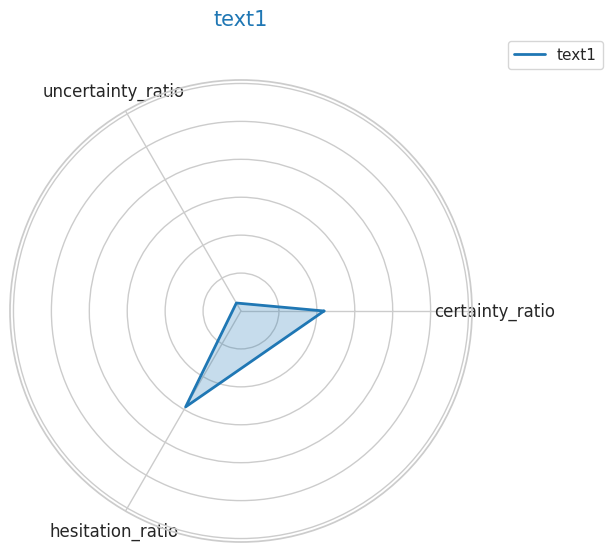

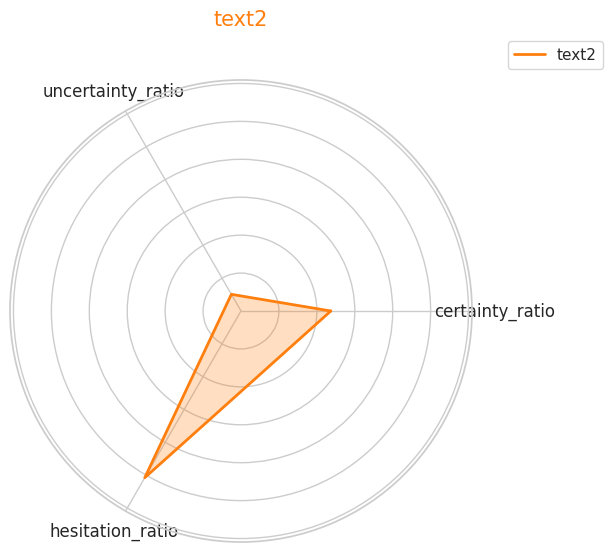

In [35]:
labels = ['certainty_ratio', 'uncertainty_ratio', 'hesitation_ratio']
num_vars = len(labels)

def make_radar_chart(row, title, color):
    values = row[labels].values.flatten().tolist()
    # Закрываем круг, повторяя первое значение
    values += values[:1]

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2, label=title)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title(title, size=15, color=color, y=1.1)

    # Настроим радиус (максимум с запасом)
    ax.set_ylim(0, max(df[labels].max()) * 1.2)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Визуализация для каждого текста
for idx, row in df.iterrows():
    make_radar_chart(row, row['text_id'], color=['#1f77b4', '#ff7f0e'][idx])

Выводы по маркерам уверенности и неуверенности:

- **Text1** содержит меньше маркеров уверенности (9) и неуверенности (1), а также значительно меньше хезитаций (12), чем Text2.  
- **Text2** характеризуется более высоким числом маркеров уверенности (14), неуверенности (3) и особенно хезитаций (30).  

- При нормировке на общее количество слов видно, что Text2 демонстрирует чуть более выраженную уверенность (2.37% против 2.19%), большую неуверенность (0.51% против 0.24%) и вдвое больше проявлений хезитации (5.08% против 2.92%) по сравнению с Text1.

**Итог:** Text2 содержит более заметные признаки как уверенности, так и сомнений, а также гораздо больше проявлений нерешительности или пауз в речи, что может отражать более эмоционально окрашенный или менее формальный стиль изложения по сравнению с Text1.



---



*   Тип локуса контроля (внутренний/внешний)

Для определения локуса контроля используем подсчет глаголов в активном и пассивном залоге. Предполагается, что большее количество глаголов в активном залоге и меньшее количество пассивного залога в тексте будет указывать на внутренний локус контроля: ответственность субъекта, инициативу, контроль над ситуацией, в отличие от внешнего локуса контроля, предполагающего объяснения действий внешними обстоятельствами

In [36]:
def voice_analysis_spacy(text):
    doc = nlp(text)
    active_count = 0
    passive_count = 0

    for token in doc:
        # Интересуют глаголы
        if token.pos_ == "VERB" or token.pos_ == "AUX":
            voice = token.morph.get("Voice")
            if voice:
                if "Pass" in voice:
                    passive_count += 1
                elif "Act" in voice:
                    active_count += 1
            else:
                # Если залог не определён, считаем активным
                active_count += 1

    total = active_count + passive_count
    if total == 0:
        return {'active_ratio': 0, 'passive_ratio': 0}

    return {
        'active_ratio': active_count / total,
        'passive_ratio': passive_count / total
    }

# Применение к DataFrame
df['voice_ratios'] = df['text'].apply(voice_analysis_spacy)
df['active_voice_ratio'] = df['voice_ratios'].apply(lambda x: x['active_ratio'])
df['passive_voice_ratio'] = df['voice_ratios'].apply(lambda x: x['passive_ratio'])

print(df[['text_id', 'active_voice_ratio', 'passive_voice_ratio']])

  text_id  active_voice_ratio  passive_voice_ratio
0   text1            0.857143             0.142857
1   text2            0.966102             0.033898


Добавим визуализацию

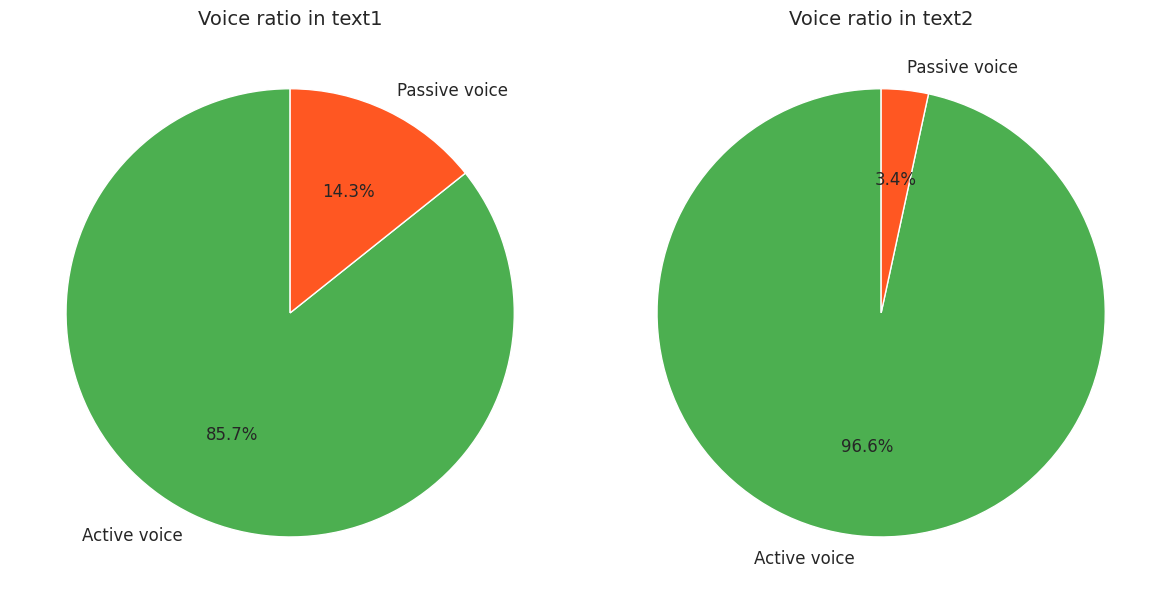

In [37]:
labels = ['Active voice', 'Passive voice']
colors = ['#4CAF50', '#FF5722']  # зеленый и оранжевый

fig, axes = plt.subplots(1, 2, figsize=(12,6))

for i, text_id in enumerate(df['text_id']):
    sizes = [df.loc[i, 'active_voice_ratio'], df.loc[i, 'passive_voice_ratio']]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
    axes[i].set_title(f'Voice ratio in {text_id}', fontsize=14)

plt.tight_layout()
plt.show()

В анализируемых текстах преобладает активный залог глаголов:  

- **Text1** — около 86% глаголов в активном залоге, 14% — в пассивном.  
- **Text2** — еще более выраженное доминирование активного залога — около 97%.  

Это может свидетельствовать о более прямом и инициативном стиле повествования, где субъекты чаще выступают в роли действующих лиц, чем пассивных объектов.  

Пассивный залог встречается редко и указывает на менее выраженный акцент на внешних воздействиях или на ситуации, где действие направлено на субъект.

Однако во втором тексте внутренний локус контроля более выражен, что может указывать на активность и лидерские качества личности.



---



*   Другие метрики

Реализуем подсчет меры MSP (Mean size of paradigm), обозначающую морфологическое разнообразие речи и впервые предложенную в статье (Xanthos et al., 2011). Метод заключался в расчёте меры MSP – среднего размера парадигмы, эта мера определялась авторами как количество уникальных словоформ, деленные на количество уникальных лемм. Большая мера MSP означает большее морфологическое богатство речи.

In [38]:
def compute_msp(text, morph):
    tokens = [token for token in re.findall(r'\b\w+\b', text.lower()) if token.isalpha()]
    lemmas = [morph.parse(token)[0].normal_form for token in tokens]
    unique_tokens = set(tokens)
    unique_lemmas = set(lemmas)
    if len(unique_lemmas) == 0:
        return 0
    return len(unique_tokens) / len(unique_lemmas)

# Пример применения к df с колонкой 'text' и инициализацией pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

df['MSP'] = df['text'].apply(lambda x: compute_msp(x, morph))

print(df[['text_id', 'MSP']])

  text_id       MSP
0   text1  1.239264
1   text2  1.159292


/tmp/ipython-input-39-3552722096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='text_id', y='MSP', data=df, palette='pastel')


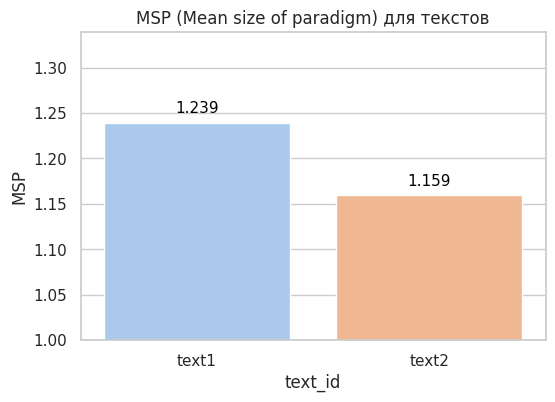

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
ax = sns.barplot(x='text_id', y='MSP', data=df, palette='pastel')
ax.set_title('MSP (Mean size of paradigm) для текстов')
ax.set_ylim(1, max(df['MSP']) + 0.1)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

- **Text1**: MSP ≈ 1.24 — указывает на более высокую морфологическую вариативность, то есть слова чаще имеют разные формы.
- **Text2**: MSP ≈ 1.16 — немного ниже, что говорит о более однородном использовании словоформ.

Таким образом, *Text1* характеризуется большим разнообразием форм слов, тогда как *Text2* — более стабильной формой лексики.



---



Реализуем также классическую меру для оценки длины высказываний MLU (Mean Length of Utterance), предложенную в работе Brown, R. (1973). *A First Language: The Early Stages*. Эта мера отражает среднюю длину высказываний в словах или морфемах и используется для оценки языкового развития и сложности речевых конструкций. В нашем исследовании мы рассчитываем MLU в словах и слогах, что позволяет получить представление о среднем размере высказываний в текстах.

In [40]:
# Функция подсчёта слогов в слове (по гласным)
def count_syllables(word):
    return len(re.findall(r'[аеёиоуыэюя]', word.lower()))

# Функция подсчёта MLU в словах и слогах
def compute_mlu(text):
    # Разбиваем на предложения
    utterances = re.split(r'[.!?…]+', text)
    utterances = [utt.strip() for utt in utterances if utt.strip()]

    if not utterances:
        return {'mlu_words': 0, 'mlu_syllables': 0}

    words_per_utt = []
    syllables_per_utt = []

    for utt in utterances:
        words = re.findall(r'\b\w+\b', utt.lower())
        words_per_utt.append(len(words))
        syllables_per_utt.append(sum(count_syllables(w) for w in words))

    mlu_words = np.mean(words_per_utt)
    mlu_syllables = np.mean(syllables_per_utt)

    return {'mlu_words': mlu_words, 'mlu_syllables': mlu_syllables}

# Применяем к колонке с текстом
df[['mlu_words', 'mlu_syllables']] = df['text'].apply(lambda x: pd.Series(compute_mlu(x)))

print(df[['text_id', 'mlu_words', 'mlu_syllables']])

  text_id  mlu_words  mlu_syllables
0   text1  19.571429      38.095238
1   text2  10.944444      21.796296


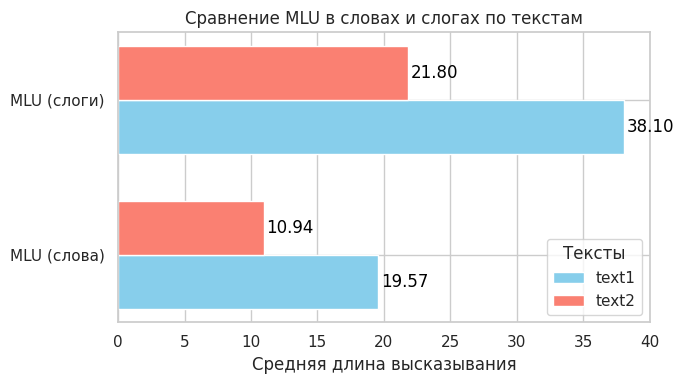

In [41]:
texts = df['text_id'].tolist()
mlu_words = df['mlu_words'].tolist()
mlu_syllables = df['mlu_syllables'].tolist()

labels = ['MLU (слова)', 'MLU (слоги)']
y = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(7, 4))

bar_height = 0.35
colors = ['skyblue', 'salmon']

for i, (text, word_val, syll_val) in enumerate(zip(texts, mlu_words, mlu_syllables)):
    values = [word_val, syll_val]
    color = colors[i % len(colors)]
    ax.barh(y + i * bar_height, values, height=bar_height, label=text, color=color)

ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(labels)
ax.set_xlabel('Средняя длина высказывания')
ax.set_title('Сравнение MLU в словах и слогах по текстам')
ax.legend(title='Тексты')

for i, (word_val, syll_val) in enumerate(zip(mlu_words, mlu_syllables)):
    ax.text(word_val + 0.2, y[0] + i * bar_height, f'{word_val:.2f}', va='center', color='black')
    ax.text(syll_val + 0.2, y[1] + i * bar_height, f'{syll_val:.2f}', va='center', color='black')

plt.tight_layout()
plt.show()

Выводы об MLU двух текстов: средняя длина высказывания в словах (MLU) у text1 значительно выше, чем у text2, что указывает на более длинные предложения. Аналогично, MLU в слогах для text1 почти вдвое превышает показатель text2, подтверждая более сложную структуру высказываний в первом тексте.




---



Посмотрим на итоговый датафрейм с метриками

In [42]:
df

,text_id,text,clean_text,lemmatized_text,flesch_reading_ease,gunning_fog_index,coleman_liau_index,lemmatized_tokens,TTR,avg_freq,...,hesitation_count,certainty_ratio,uncertainty_ratio,hesitation_ratio,voice_ratios,active_voice_ratio,passive_voice_ratio,MSP,mlu_words,mlu_syllables
0,text1,"\nИтак, если говорить о моём предыдущем месте ...",итак если говорить о моём предыдущем месте раб...,итак если говорить о мой предыдущий место рабо...,100.017778,8.755556,9.742640,"[итак, если, говорить, о, мой, предыдущий, мес...",0.441261,5879.765973,...,12,0.021898,0.002433,0.029197,"{'active_ratio': 0.8571428571428571, 'passive_...",0.857143,0.142857,1.239264,19.571429,38.095238
1,text2,\nЭ-э. (пауза) Мой рабочий день строится в вос...,мой рабочий день строится в воскресенье потому...,мой рабочий день строиться в воскресение потом...,109.714019,4.686957,10.759926,"[мой, рабочий, день, строиться, в, воскресение...",0.451404,4501.492484,...,30,0.023689,0.005076,0.050761,"{'active_ratio': 0.9661016949152542, 'passive_...",0.966102,0.033898,1.159292,10.944444,21.796296


Приведем датафрейм в удобный вид для подсчета статистики. Преобразуем айди текстов в индексы, удалим лишние и вспомогательные колонки, оставив только значения метрик. Сохраним датафрейм в csv и xlsx форматах для дальнейшего использования.

In [43]:
df['text_id'] = df['text_id'].str.extract(r'(\d+)').astype(int)
df.set_index('text_id', inplace=True)

In [44]:
cols_to_drop = [
    'text',
    'clean_text',
    'lemmatized_text',
    'lemmatized_tokens',
    'voice_ratios',
    'certainty_metrics',
    'temporal_focus'
]

df = df.drop(columns=cols_to_drop)

In [47]:
from google.colab import files
df.to_csv("interview_metrics_dataset.csv", index=False)
files.download("interview_metrics_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
df.to_excel("interview_metrics_dataset.xlsx", index=False)
files.download("interview_metrics_dataset.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>